In [22]:
html.eval('''<h1 style="text-align: center;">Aufgabe 1</h1>
          <h2 style="text-align: center;">
              Angewandte Mathematik
          </h2>
          <h4 style="text-align: center;">
              von Alexander M. Westphal, Klaus Riedl, Robert Taglauer
          </h4>''')

<h1 style="text-align: center;">Aufgabe 1</h1>
          <h2 style="text-align: center;">
              Angewandte Mathematik
          </h2>
          <h4 style="text-align: center;">
              von Alexander M. Westphal, Klaus Riedl, Robert Taglauer
          </h4>

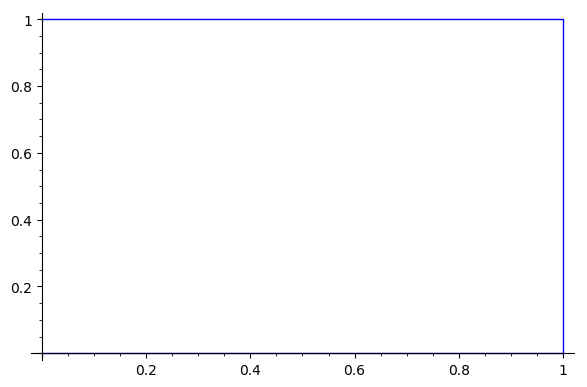

In [6]:
data = [(0,0),(1,0),(1,1),(0,1)]
# (0.25,0), (0.25,-0.25),(0.75,-0.25),(0.75,0),
line(data)

In [19]:
html.eval('''<h1 style="text-align: left;">Aufgabe 1 a</h1>''')

<h1 style="text-align: left;">Aufgabe 1 a</h1>

In [26]:
iterations = int(input('The number of Iterations: '))

data = [(0,0),(1,0),(1,1),(0,1)]

def iterator(iterations):
    global data
    line(data)
    newdata = []
    if iterations == 0:
        return
    else:
        for point in range(len(data)):
            if point+1 == len(data):
                iterator(iterations-1)
            else:
                newPoints = []
                pointa = data[point]
                pointb = data[point+1]
                lenX = pointb[0]-pointa[0] if pointb[0]-pointa[0] > 0 else pointa[0]-pointb[0]
                lenY = pointb[1]-pointa[1] if pointb[1]-pointa[1] > 0 else pointa[1]-pointb[1]
                if lenX == 0:
                    newLen = (1/3) * lenY 
                    newPoints.extend([
                        (pointa[0], pointa[1]+newLen),
                        (pointa[0]+newLen, pointa[1]+newLen),  
                        (pointa[0]+newLen, pointa[1]+2*newLen),
                        (pointa[0], pointa[1]+newLen)
                    ])
                elif lenY == 0:
                    newLen = (1/3) * lenX
                    newPoints.extend([
                        (pointa[0]+newLen, pointa[1]),
                        (pointa[0]+newLen, pointa[1]+newLen),  
                        (pointa[0]+2*newLen, pointa[1]+newLen),
                        (pointa[0]+2*newLen, pointa[1])
                    ])
                    
                else:
                    print 'Something went wrong'
                newdata.extend(pointa)
                newdata.extend(newPoints)
                newdata.extend(pointb)
        data = newdata
            
iterator(iterations)
            

The number of Iterations: 2


In [24]:
html.eval('''<h1 style="text-align: left;">Aufgabe 1 b</h1>''')

<h1 style="text-align: left;">Aufgabe 1 b</h1>

In [25]:
html.eval('''<h1 style="text-align: left;">Aufgabe 1 c</h1>''')

<h1 style="text-align: left;">Aufgabe 1 c</h1>